<a href="https://colab.research.google.com/github/RicardoMourao-py/INFORMACOES_GEORREFERENCIADAS/blob/main/projeto_infogeo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Instalando bibliotecas

In [1]:
!pip install geopandas --quiet
!pip install geopy --quiet
!pip install pointpats==2.3.0 --quiet
!pip install fiona --quiet
!pip install seaborn --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 66.8 MB/s eta 0:00:00


## Importando Bibliotecas

In [2]:
import geopandas as gpd
import fiona as f
from pointpats import PointPattern
import matplotlib.pyplot as plt
import os
import numpy as np
from pointpats.centrography import mean_center, weighted_mean_center, std_distance, ellipse
from matplotlib.patches import Ellipse
from pointpats import hull
import pointpats.quadrat_statistics as qs
import seaborn as sns
import math
from pointpats.distance_statistics import K
from pointpats import PoissonPointProcess
import itertools
from pointpats.distance_statistics import Kenv
from google.colab import files

In [30]:
equip_esporte_clube = gpd.read_file("SIRGAS_GPKG_TEMA_ESPORTE_CLUBE.gpkg")
equip_esporte_clube_comunidade = gpd.read_file("SIRGAS_GPKG_TEMA_ESPORTE_CLUBE DA COMUNIDADE.gpkg")
equip_esporte_centro_esportivo = gpd.read_file("SIRGAS_GPKG_TEMA_ESPORTE_CENTRO ESPORTIVO.gpkg")
equip_esporte_estadio = gpd.read_file("SIRGAS_GPKG_TEMA_ESPORTE_ESTADIO.gpkg")
equip_esporte_outros = gpd.read_file("SIRGAS_GPKG_TEMA_ESPORTE_OUTROS.gpkg")
distritos = gpd.read_file("distritos-sp.geojson")

In [31]:
distritos.head(1)

,primaryind,ds_codigo,ds_subpref,ds_cd_sub,ds_sigla,ds_nome,geometry
0,1.0,63,PIRITUBA-JARAGUA,02,PIR,PIRITUBA,"MULTIPOLYGON (((-46.71217 -23.45452, -46.7122 ..."


In [5]:
equip_esporte_clube.head(1)

,eq_nome,eq_bairro,eq_cep,eq_cd_tipo,eq_tipo,eq_enderec,eq_cd_esfe,eq_classe,eq_rede,eq_cd_tema,geometry
0,CENTRO ESPORTIVO TIETÊ,LUZ,1101000,9,9,"AV SANTOS DUMONT, 843",PÚBLICO - MUNICIPAL,CLUBE,SEM REDE,5,POINT (333498.8 7397872.72)


In [6]:
equip_esporte_clube_comunidade.head(1)

,eq_nome,eq_bairro,eq_cep,eq_cd_tipo,eq_tipo,eq_enderec,eq_cd_esfe,eq_classe,eq_rede,eq_cd_tema,geometry
0,CDC UNIÃO PARQUE SÃO RAFAEL,SÃO RAFAEL,8310490,11,11,"RUA FREI MATEUS DE ASSUNÇÃO, S/N",PÚBLICO - MUNICIPAL,CLUBE DA COMUNIDADE,SEM REDE,5,POINT (349790.13 7386446.49)


In [7]:
equip_esporte_centro_esportivo.head(1)

,eq_nome,eq_bairro,eq_cep,eq_cd_tipo,eq_tipo,eq_enderec,eq_cd_esfe,eq_classe,eq_rede,eq_cd_tema,geometry
0,GINÁSIO ESPORTIVO DARCY REIS,VILA GUILHERME,2053003,1,1,"AV GUILHERME, 1819",PÚBLICO - MUNICIPAL,CENTRO ESPORTIVO,SEM REDE,5,POINT (336647.3 7399338.16)


In [9]:
equip_esporte_estadio.head(1)

,eq_nome,eq_bairro,eq_cep,eq_cd_tipo,eq_tipo,eq_enderec,eq_cd_esfe,eq_classe,eq_rede,eq_cd_tema,geometry
0,ESTÁDIO MUNICIPAL JACK MARIN,ACLIMAÇÃO,1534001,8,8,"R MUNIZ DE SOUSA, 1119",PÚBLICO - MUNICIPAL,ESTADIO,SEM REDE,5,POINT (333877.77 7392070.01)


In [11]:
equip_esporte_outros.head(1)

,eq_nome,eq_bairro,eq_cep,eq_cd_tipo,eq_tipo,eq_enderec,eq_cd_esfe,eq_classe,eq_rede,eq_cd_tema,geometry
0,CENTRO OLÍMPICO DE TREINAMENTO E PESQUISA,INDIANÓPOLIS,4028001,5,5,"AV IBIRAPUERA, 1315",PÚBLICO - MUNICIPAL,OUTROS,SEM REDE,5,POINT (331002.27 7389264.75)


In [15]:
equip_esporte_clube.crs

<Projected CRS: EPSG:31983>
Name: SIRGAS 2000 / UTM zone 23S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Brazil - between 48°W and 42°W, northern and southern hemispheres, onshore and offshore.
- bounds: (-48.0, -33.5, -42.0, 5.13)
Coordinate Operation:
- name: UTM zone 23S
- method: Transverse Mercator
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

[]

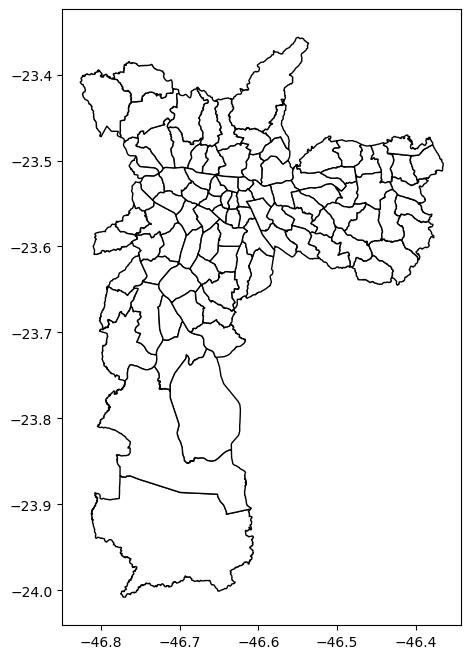

In [37]:
fig, ax = plt.subplots(figsize=(10,8))
distritos.plot(ax = ax, color='white', edgecolor='k')
# esporte_clube.plot(ax=ax, color='gray', edgecolor='k')
plt.plot()

In [ ]:
equip_trab_empreend.columns

Index(['ad_enderec', 'ad_prog', 'ad_site', 'ad_unidade', 'ad_agenda',
       'ad_contato', 'ad_detalhe', 'ad_horario', 'geometry'],
      dtype='object')